In [2]:
import numpy as np
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)
from cfel_geom import apply_geometry_from_file
a = np.ones((128,512*16))
b = apply_geometry_from_file(a,'../geometry/agipd_taw9_oy2_1050addu_hmg5.geom')

Populating the interactive namespace from numpy and matplotlib


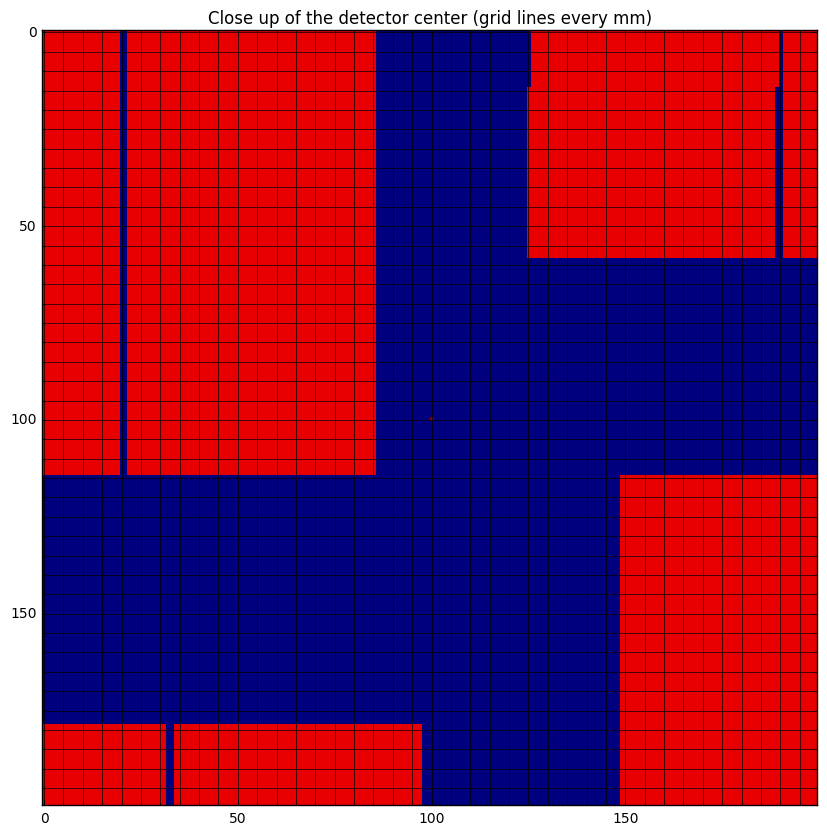

In [14]:
# Mark the center
c_x = b.shape[0]/2
c_y = b.shape[1]/2
b[c_x,c_y] = 1.1

figure()
imshow(b[c_x-100:c_x+100,c_y-100:c_y+100])
# Mark ticks at every milimeter (every 5 pixels)
ax = gca()
ax.set_xticks(np.arange(0,200,5), minor=True)
ax.set_yticks(np.arange(0,200,5), minor=True)
ax.grid(True,which='minor', axis='both',linestyle='-', color='k')
ax.set_title('Close up of the detector center (grid lines every mm)')


Melbourne virus (200 nm): 820.0 photons


/Library/Python/2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10
/Library/Python/2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in log10
/Library/Python/2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in multiply


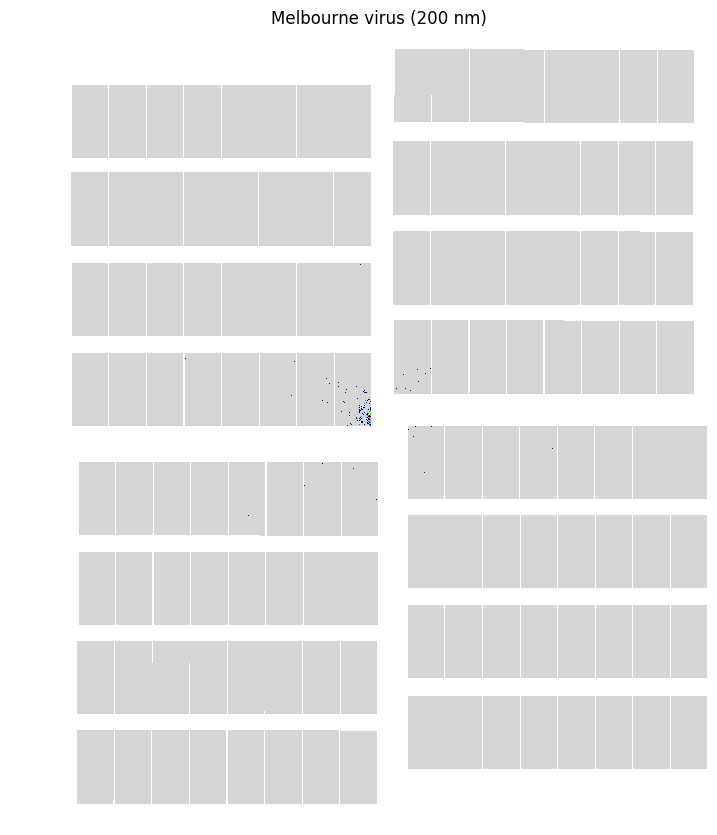

Mimi virus (450 nm): 3516.0 photons


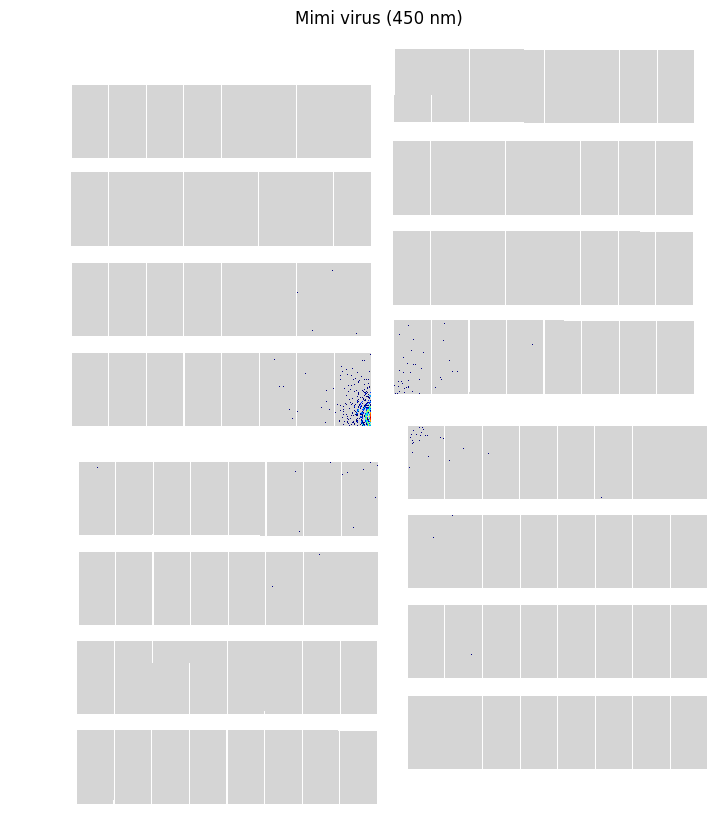

In [15]:
import condor
p = condor.utils.photon.Photon(energy_eV=9400.)
src = condor.Source(wavelength=p.get_wavelength(), pulse_energy=0.5E-3, focus_diameter=15E-6)
det = condor.Detector(pixel_size=200E-6, distance=5.4, mask=(b==1))

samples = {"Mimi virus (450 nm)": 450E-9, "Melbourne virus (200 nm)": 200E-9,}

for (n, d) in samples.items():
        #par = {"particle_map": condor.ParticleMap(geometry="icosahedron", diameter=450E-9, material_type="cell")}
        par = {"particle_sphere": condor.ParticleSphere(diameter=d, material_type="cell") }
        E = condor.Experiment(source=src, particles=par, detector=det)
        res = E.propagate()
        img = res["entry_1"]["data_1"]["data"]
        msk = res["entry_1"]["data_1"]["mask"] == 0
        print "%s: %.1f photons" % (n, img[msk].sum())
        figure()
        ax = gca()
        ax.set_title(n)
        ax.imshow(log10(msk*10), cmap='binary_r', vmin=0, vmax=1.2)
        ax.imshow(log10(poisson(img))*log10(msk*10))
        ax.set_axis_off()
        show()

Melbourne virus (200 nm): 858.6 photons


/Library/Python/2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10
/Library/Python/2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10


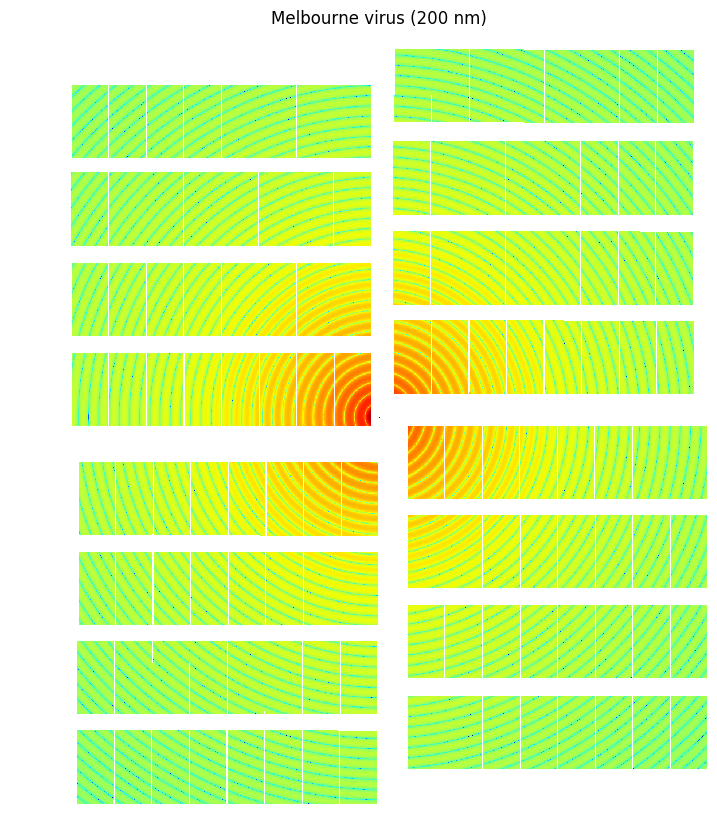

Mimi virus (450 nm): 8468.2 photons


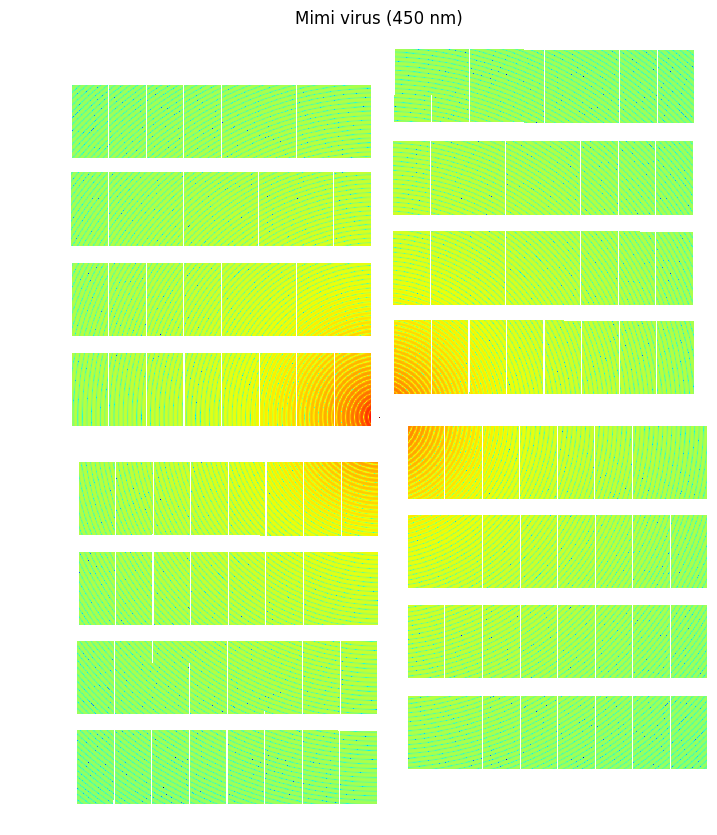

In [12]:
for (n, d) in samples.items():
        #par = {"particle_map": condor.ParticleMap(geometry="icosahedron", diameter=450E-9, material_type="cell")}
        par = {"particle_sphere": condor.ParticleSphere(diameter=d, material_type="cell") }
        E = condor.Experiment(source=src, particles=par, detector=det)
        res = E.propagate()
        img = res["entry_1"]["data_1"]["data"]
        msk = res["entry_1"]["data_1"]["mask"] == 0
        print "%s: %.1f photons" % (n, img[msk].sum())
        figure()
        ax = gca()
        ax.set_title(n)
        ax.imshow(log10(msk*10), cmap='binary_r', vmin=0, vmax=1.2)
        ax.imshow(log10(img)*log10(msk*10))
        ax.set_axis_off()
        show()